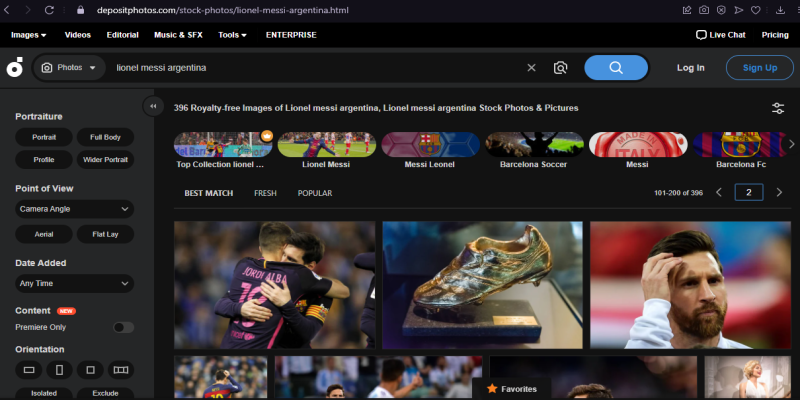

<h1>We are going the to scrape this page for collecting images of Lionel Messi</h1>
<p> We are going to use request_html for scrapping as it's very good for small projects like these</p>

In [7]:
from requests_html import HTMLSession

session = HTMLSession()
response = session.get(f'https://depositphotos.com/stock-photos/lionel-messi-argentina.html?offset=0&utm_source=google&utm_medium=cpc&utm_campaign=DP_Asia_EN_DSA&utm_term=')
source = response.html
print(source.html)

<!DOCTYPE html><html lang="en" prefix="og: http://ogp.me/ns#"><head><title>Lionel messi argentina Stock Photos, Royalty Free Lionel messi argentina Images | Depositphotos</title><meta name="description" content="⬇ Download stock pictures of Lionel messi argentina on Depositphotos ✔ Photo stock for commercial use - millions of high-quality, royalty-free photos &#38; images" /><link rel="canonical" href="https://depositphotos.com/stock-photos/lionel-messi-argentina.html"  /><meta property="og:url" content="https://depositphotos.com/stock-photos/lionel-messi-argentina.html?utm_source=google&utm_medium=cpc&utm_campaign=DP_Asia_EN_DSA&utm_term"  /><meta property="og:title" content="Lionel messi argentina Stock Photos, Royalty Free Lionel messi argentina Images | Depositphotos"  /><meta property="og:description" content="⬇ Download stock pictures of Lionel messi argentina on Depositphotos ✔ Photo stock for commercial use - millions of high-quality, royalty-free photos & images"  /><meta prop

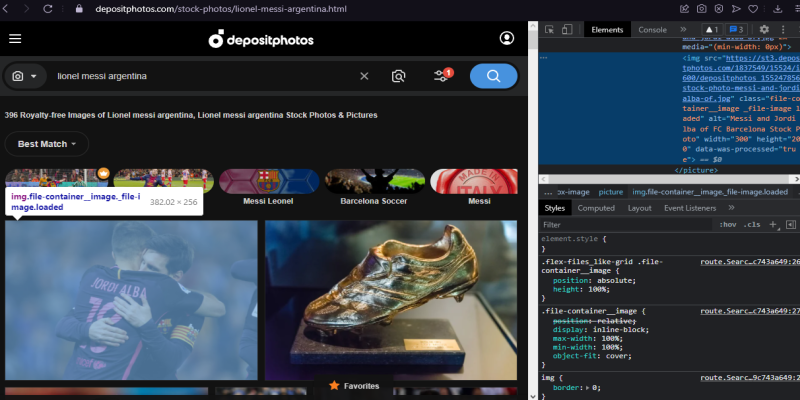

<h2>Now lets select img.dt-images for selecting all the images in the page</h2>

In [8]:
# getting the container which has all the img tags in it
image_container = source.find('div.files-slider', first=True) #first just selects first tag
image_container

<Element 'div' class=('files-slider',)>

<p>Getting all the links of the photos</p>

In [9]:
images = image_container.find("img")
for img in images:
    try:
        print(img.attrs['src'])
    except:
        print(img.attrs['data-src'])

https://st.depositphotos.com/1837549/1919/i/600/depositphotos_19190963-stock-photo-leo-messi-of-fc-barcelona.jpg?forcejpeg=true
https://st3.depositphotos.com/1074930/14904/i/600/depositphotos_149042067-stock-photo-wax-figur-of-lionel-messi.jpg?forcejpeg=true
https://static8.depositphotos.com/1010238/868/i/600/depositphotos_8688480-stock-photo-graffiti-in-honor-lionel-messi.jpg?forcejpeg=true
https://st.depositphotos.com/1837549/1886/i/600/depositphotos_18860315-stock-photo-leo-messi-of-fc-barcelona.jpg?forcejpeg=true
https://st.depositphotos.com/1837549/1651/i/600/depositphotos_16515987-stock-photo-messi-holds-up-his-golden.jpg?forcejpeg=true
https://st.depositphotos.com/1010238/1805/i/600/depositphotos_18050049-stock-photo-tribute-to-messi.jpg?forcejpeg=true
https://static8.depositphotos.com/1010238/1039/i/600/depositphotos_10398080-stock-photo-graffiti-in-honor-lionel-messi.jpg?forcejpeg=true
https://static7.depositphotos.com/1046202/727/i/600/depositphotos_7279493-stock-photo-3d-soc

<h2> Now lets create a funcion which will save the image we got and save it to the desktop</h2>

In [1]:
def save_img(file_path, img):
    with open(file_path, 'wb') as file:
        file.write(img) 
    
# a function to get the sourcepath out of the element
def get_path(img):
    try:
        path = img.attrs['src']
    except:
        path = img.attrs['data-src']
        
    return path

# now lets go throught all the pages of the website and get the pictures and save it to the desktop

In [2]:
import time
import os
import requests
import shutil
from requests_html import HTMLSession


if os.path.exists("./Lionel Messi"):
    shutil.rmtree('./Lionel Messi')   # the code here only make sure that if Lionel Messi file already exists then delete it
    os.mkdir('./Lionel Messi')        # and create a new Lionel Messi file
else:
    os.mkdir('./Lionel Messi')


session = HTMLSession() 

pages = [0, 100, 200] # lets take all the images of the first 3 pages(you can try more)

img_count = 0

for page in pages:
    response = session.get(f'https://depositphotos.com/stock-photos/lionel-messi-argentina.html?offset={page}&utm_source=google&utm_medium=cpc&utm_campaign=DP_Asia_EN_DSA&utm_term=')
    source = response.html
    
    image_container = source.find('div.files-slider', first=True) # get all the images of the the current page
    images = image_container.find("img")
    
    for img in images: # going thourgh all the images of the current page
        try:
            
            img_src = get_path(img)
            
        #   now lets make a request to get the image in byest thought requests.get().content
            img_byte = requests.get(img_src).content 

        #   lets save the file 
            path = './Lionel Messi/' + 'lionel_messi_' + str(img_count) + '.jpg'
            save_img(path, img_byte)

            print(img_count) # keep track of number of images downloaded
            time.sleep(3)   # to make sure that we do not spam the website with continuos request
            img_count += 1
            
        except:
            print(img_src)
#             raise Exception("No image found")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# IN THE END WE MANAGED TO GET ALL THE IMAGES AND SAVE THEM TO THE DESKTOP

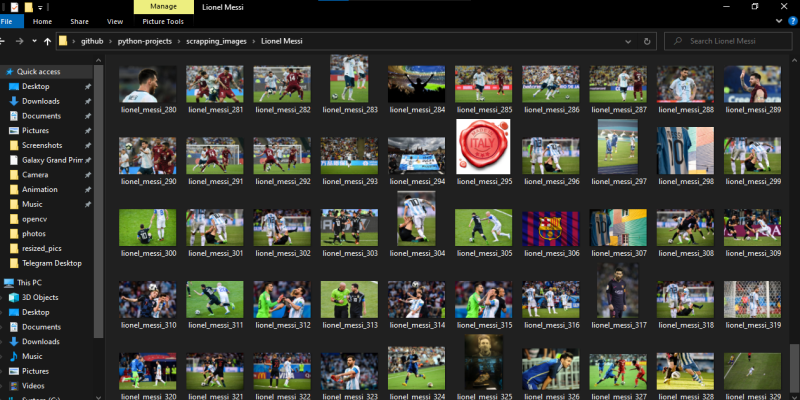